APP INSTALLATION

In [ ]:
!pip install gradio
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install --upgrade gradio scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.14.0
    Uninstalling gradio_client-1.14.0:
      Successfully uninstalled gradio_client-1.14.0
  Attempting uninstall: gradio
    Found existing installation: gradio 5.50.0
    Uninstalling 

UPLOAD THE DATASET

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload 'accident.csv'

Saving Training.csv to Training.csv


LOAD THE DATASET

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/adduadnanali/Road-Accident-Analysis-in-India/main/accident.csv'
df = pd.read_csv(url)

# Show first few rows
df.head()

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,1001,Andhra Pradesh,2021-05-01,15:30:00,Speeding,2,3,Rural,Sunny,No,No,Poor,60.0
1,1002,Karnataka,2021-05-02,18:45:00,Drunk Driving,1,4,Urban,Rainy,Yes,No,Good,40.0
2,1003,Delhi,2021-05-03,10:15:00,Poor Road Conditions,0,2,Urban,Foggy,No,No,Poor,50.0
3,1004,Maharashtra,2021-05-04,06:00:00,Driver Fatigue,3,6,Rural,Sunny,No,Yes,Good,70.0
4,1005,Uttar Pradesh,2021-05-05,21:20:00,Speeding,1,2,Rural,Sunny,No,No,Fair,80.0


DATA EXPLORATION

In [ ]:
# Check basic information about the dataset
df.info()

# Check for any missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

# Get summary statistics for numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Accident_ID         300 non-null    object 
 1   State               300 non-null    object 
 2   Date                300 non-null    object 
 3   Time                300 non-null    object 
 4   Reason              300 non-null    object 
 5   Number_of_Deaths    300 non-null    int64  
 6   Number_of_Injuries  300 non-null    object 
 7   Road_Type           300 non-null    object 
 8   Weather_Conditions  300 non-null    object 
 9   Alcohol_Involved    300 non-null    object 
 10  Driver_Fatigue      300 non-null    object 
 11  Road_Conditions     300 non-null    object 
 12  Speed_Limit         299 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 30.6+ KB


,Number_of_Deaths,Speed_Limit
count,300.000000,299.000000
mean,1.766667,56.989967
std,1.090651,13.042390
min,0.000000,30.000000
25%,1.000000,50.000000
50%,2.000000,60.000000
75%,3.000000,60.000000
max,5.000000,90.000000


In [ ]:
# Check missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

VISUALIZATION

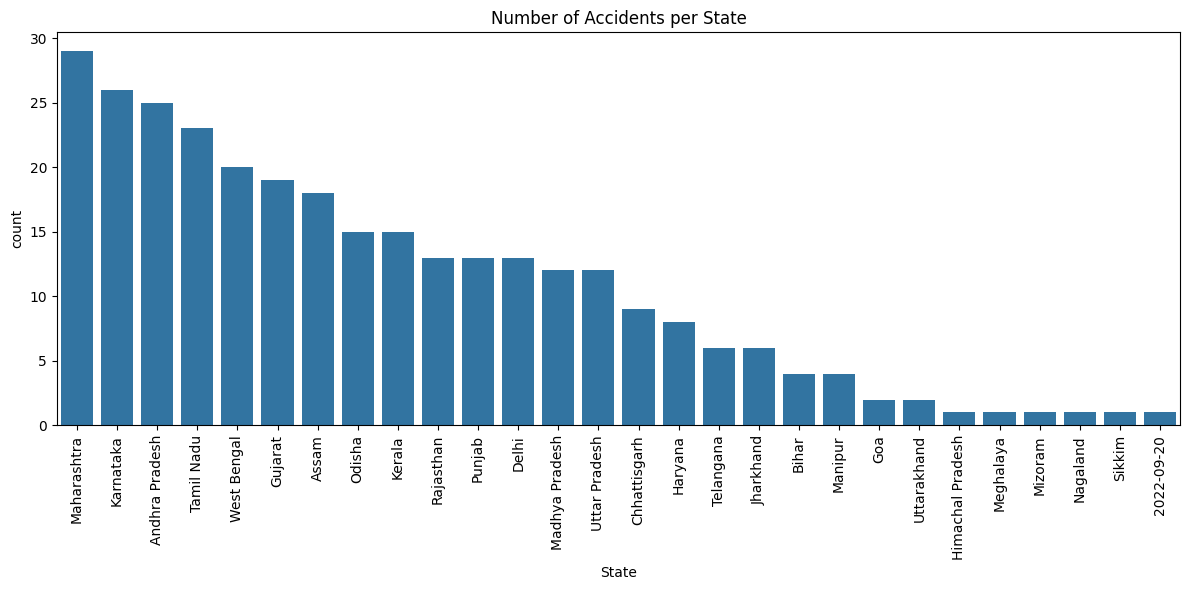

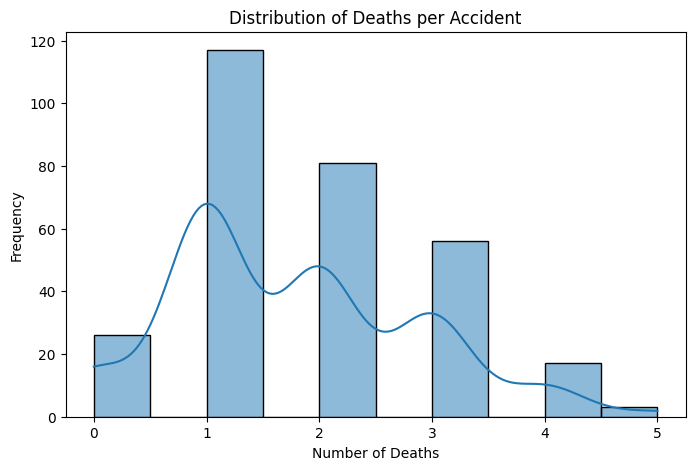

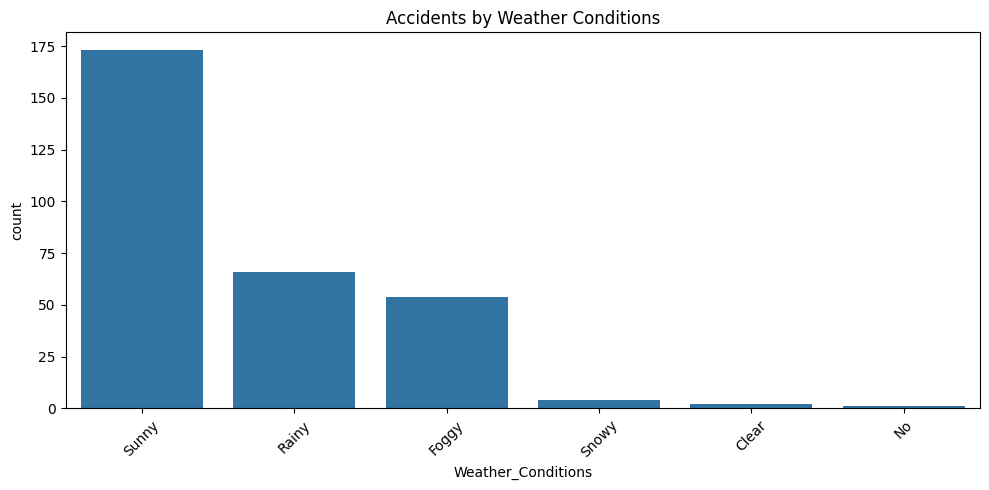

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Accidents per State')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(df['Number_of_Deaths'], bins=10, kde=True)
plt.title('Distribution of Deaths per Accident')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Accidents by Weather Conditions')
plt.tight_layout()
plt.show()

IDENTIFY FEATURES AND TARGET

In [ ]:
# Convert death and injury counts to integers
df['Number_of_Deaths'] = pd.to_numeric(df['Number_of_Deaths'], errors='coerce')
df['Number_of_Injuries'] = pd.to_numeric(df['Number_of_Injuries'], errors='coerce')

# Fill any NaNs (caused by conversion errors) with 0
df['Number_of_Deaths'] = df['Number_of_Deaths'].fillna(0).astype(int)
df['Number_of_Injuries'] = df['Number_of_Injuries'].fillna(0).astype(int)

# Now apply the function to create Risk_Level
def classify_risk(row):
    total = row['Number_of_Deaths'] + row['Number_of_Injuries']
    if total >= 5:
        return 'High'
    elif total >= 2:
        return 'Medium'
    else:
        return 'Low'

df['Risk_Level'] = df.apply(classify_risk, axis=1)

CONVERT CATEGORICAL INTO NUMERICAL ENCODING

In [ ]:
# First, replace any non-numeric values (like 'Unknown') with 0
df['Number_of_Deaths'] = pd.to_numeric(df['Number_of_Deaths'], errors='coerce').fillna(0).astype(int)
df['Number_of_Injuries'] = pd.to_numeric(df['Number_of_Injuries'], errors='coerce').fillna(0).astype(int)
def classify_risk(row):
    total = row['Number_of_Deaths'] + row['Number_of_Injuries']
    if total >= 5:
        return 'High'
    elif total >= 2:
        return 'Medium'
    else:
        return 'Low'

df['Risk_Level'] = df.apply(classify_risk, axis=1)
df[['Number_of_Deaths', 'Number_of_Injuries', 'Risk_Level']].head()

,Number_of_Deaths,Number_of_Injuries,Risk_Level
0,2,3,High
1,1,4,High
2,0,2,Medium
3,3,6,High
4,1,2,Medium


FEATURE SCALING

In [ ]:
# Select useful features + the target column
df_model = df[['Weather_Conditions', 'Road_Type', 'Road_Conditions',
               'Alcohol_Involved', 'Driver_Fatigue', 'Speed_Limit', 'Time', 'Risk_Level']].copy()

# Convert 'Time' to Hour
df_model['Hour'] = pd.to_datetime(df_model['Time'], errors='coerce').dt.hour.fillna(0).astype(int)

# Drop the original 'Time' column now that we've extracted hour
df_model.drop('Time', axis=1, inplace=True)

# Convert categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_model, columns=['Weather_Conditions', 'Road_Type',
                                               'Road_Conditions', 'Alcohol_Involved',
                                               'Driver_Fatigue'], drop_first=True)

# Separate features and target
X = df_encoded.drop('Risk_Level', axis=1)
y = df_encoded['Risk_Level']

/tmp/ipython-input-3195567015.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_model['Hour'] = pd.to_datetime(df_model['Time'], errors='coerce').dt.hour.fillna(0).astype(int)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (Risk_Level)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

MODEL BUILDING

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

EVALUATION

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.48333333333333334
              precision    recall  f1-score   support

        High       0.57      0.38      0.46        34
         Low       0.50      1.00      0.67         1
      Medium       0.43      0.60      0.50        25

    accuracy                           0.48        60
   macro avg       0.50      0.66      0.54        60
weighted avg       0.51      0.48      0.48        60



MAKE PREDICTION FROM NEW INPUT

In [ ]:
def predict_risk(weather, road_type, road_condition, alcohol, fatigue, speed_limit, hour):
    # Debug: Check what inputs are being passed
    print(f"Weather: {weather}, Road Type: {road_type}, Road Condition: {road_condition}, Alcohol: {alcohol}, Fatigue: {fatigue}, Speed Limit: {speed_limit}, Hour: {hour}")

    # Create a DataFrame from input
    input_data = pd.DataFrame([{
        'Speed_Limit': float(speed_limit),
        'Hour': int(hour),
        'Weather_Conditions_' + weather: 1,
        'Road_Type_' + road_type: 1,
        'Road_Conditions_' + road_condition: 1,
        'Alcohol_Involved_' + alcohol: 1,
        'Driver_Fatigue_' + fatigue: 1
    }])

    # Add missing columns with 0
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    # Reorder columns
    input_data = input_data[X.columns]

    # Scale the features
    input_scaled = scaler.transform(input_data)

    # Predict
    prob = model.predict_proba(input_scaled)[0]
    pred = model.predict(input_scaled)[0]

    risk_label = le.inverse_transform([pred])[0]
    confidence = max(prob)

    # Suggested action (custom logic)
    if risk_label == 'High':
        suggestion = "⚠️ Slow down, avoid peak hours, check road alerts."
    elif risk_label == 'Medium':
        suggestion = "🟡 Drive cautiously, maintain safe speed."
    else:
        suggestion = "🟢 Safe to proceed, but stay alert."

    return risk_label, f"{confidence*100:.2f}%", suggestion

GRADIO APP INTERFACE

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd

# Assuming X is a DataFrame with your model features
# This should be defined before this code or loaded from somewhere
# For demonstration, I'll add a mock predict_risk function

def predict_risk(weather, road_type, road_cond, alcohol, fatigue, speed, hour):
    """
    Predicts traffic risk based on input parameters.

    Args:
        weather: Selected weather condition
        road_type: Selected road type
        road_cond: Selected road condition
        alcohol: Whether alcohol is involved
        fatigue: Whether driver fatigue is involved
        speed: Speed limit in km/h
        hour: Hour of the day (0-23)

    Returns:
        Tuple of (risk level, probability, suggested action)
    """
    # Create a feature array for prediction
    # In a real implementation, you would:
    # 1. Create a zero-vector matching your model's expected input size
    # 2. Set the appropriate one-hot encoded features to 1
    # 3. Run the vector through your prediction model

    # For this example, I'll use a simple rule-based approach
    risk_score = 0

    # Weather factors
    high_risk_weather = ["Rain", "Snow", "Fog", "Storm"]
    if weather in high_risk_weather:
        risk_score += 30

    # Road type factors
    if road_type in ["Highway", "Rural"]:
        risk_score += 20

    # Road condition factors
    if road_cond in ["Wet", "Icy", "Snow covered"]:
        risk_score += 25

    # Alcohol factor
    if alcohol == "Yes":
        risk_score += 50

    # Fatigue factor
    if fatigue == "Yes":
        risk_score += 35

    # Speed factor (higher speeds increase risk)
    risk_score += min(30, (speed - 30) / 2) if speed > 30 else 0

    # Hour factor (late night hours increase risk)
    if hour >= 22 or hour <= 5:
        risk_score += 20

    # Normalize risk score to probability (0-100%)
    probability = min(95, max(5, risk_score)) / 100

    # Determine risk level
    if probability < 0.3:
        risk_level = "Low Risk"
        action = "Safe to proceed with normal caution."
    elif probability < 0.6:
        risk_level = "Moderate Risk"
        action = "Proceed with extra caution and reduced speed."
    else:
        risk_level = "High Risk"
        action = "Consider postponing travel or extreme caution required."

    return risk_level, f"{probability:.1%}", action

# Assuming X contains your feature columns
# In a real implementation, you would load your model and feature names
# For demo purposes, I'll create mock column names
X = pd.DataFrame(columns=[
    'Weather_Conditions_Clear', 'Weather_Conditions_Rain', 'Weather_Conditions_Snow', 'Weather_Conditions_Fog',
    'Road_Type_Urban', 'Road_Type_Highway', 'Road_Type_Rural',
    'Road_Conditions_Dry', 'Road_Conditions_Wet', 'Road_Conditions_Icy',
    'Alcohol_Involved_Yes', 'Alcohol_Involved_No',
    'Driver_Fatigue_Yes', 'Driver_Fatigue_No'
])

weather_opts = [col.replace('Weather_Conditions_', '') for col in X.columns if 'Weather_Conditions_' in col]
road_type_opts = [col.replace('Road_Type_', '') for col in X.columns if 'Road_Type_' in col]
road_cond_opts = [col.replace('Road_Conditions_', '') for col in X.columns if 'Road_Conditions_' in col]
alcohol_opts = [col.replace('Alcohol_Involved_', '') for col in X.columns if 'Alcohol_Involved_' in col]
fatigue_opts = [col.replace('Driver_Fatigue_', '') for col in X.columns if 'Driver_Fatigue_' in col]

with gr.Blocks() as demo:
    gr.Markdown("## 🚗 AI-Powered Traffic Risk Predictor")

    with gr.Row():
        weather = gr.Dropdown(weather_opts, label="Weather Conditions", value=weather_opts[0])
        road_type = gr.Dropdown(road_type_opts, label="Road Type", value=road_type_opts[0])
        road_cond = gr.Dropdown(road_cond_opts, label="Road Condition", value=road_cond_opts[0])

    with gr.Row():
        alcohol = gr.Dropdown(alcohol_opts, label="Alcohol Involved", value=alcohol_opts[1])  # Default to "No"
        fatigue = gr.Dropdown(fatigue_opts, label="Driver Fatigue", value=fatigue_opts[1])    # Default to "No"

    speed = gr.Number(label="Speed Limit (km/h)", value=40)
    hour = gr.Slider(0, 23, label="Hour of Day", value=12, step=1)

    with gr.Row():
        btn = gr.Button("Predict Risk")

    output1 = gr.Text(label="🧠 Risk Level")
    output2 = gr.Text(label="📊 Probability")
    output3 = gr.Text(label="✅ Suggested Action")

    btn.click(fn=predict_risk, inputs=[weather, road_type, road_cond, alcohol, fatigue, speed, hour],
              outputs=[output1, output2, output3])

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://491fea7fd940f15ca1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
